<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-Up-Environment" data-toc-modified-id="Set-Up-Environment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set Up Environment</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Train-Test-split" data-toc-modified-id="Train-Test-split-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Train Test split</a></span></li><li><span><a href="#Dummify-dataset" data-toc-modified-id="Dummify-dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dummify dataset</a></span></li><li><span><a href="#Scale-the-values" data-toc-modified-id="Scale-the-values-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Scale the values</a></span></li></ul></div>

## Set Up Environment

In [44]:
import preprocessing_module as pm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
import plotly
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)
sns.set(style = "whitegrid")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
warnings.filterwarnings(action="ignore")

In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, recall_score, roc_curve, roc_auc_score
# from collections import Counter
# from sklearn.utils.class_weight import compute_sample_weight

## Load Data

In [46]:
accepted = pd.read_csv('accepted_2007_to_2018Q4.csv')
accepted.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [47]:
accepted_clean = pm.datacleaning(accepted)

In [48]:
y = accepted_clean.loan_status
X = accepted_clean.drop('loan_status',1)

In [49]:
X.head()

,open_acc,total_acc,inq_last_6mths,collections_12_mths_ex_med,tot_coll_amt,revol_bal,pub_rec,pub_rec_bankruptcies,acc_now_delinq,all_util,revol_util,delinq_2yrs,initial_list_status,tot_cur_bal,avg_cur_bal,int_rate,dti,home_ownership,annual_inc,purpose,emp_length,term,addr_state,installment,mort_acc,application_type,verification_status,fico_range_low,fico_range_high,loan_amnt,grade,length_cr_line
421101,7.0,30.0,0.0,0.0,0.0,141.0,0.0,0.0,0.0,1.0,0.5,0.0,w,150592.0,25099.0,7.34,0.58,RENT,52000.0,major_purchase,9 years,36 months,WA,93.10,4.0,Individual,Source Verified,760.0,764.0,3000.0,A,20.0
421113,14.0,24.0,0.0,0.0,0.0,11449.0,1.0,1.0,0.0,47.0,33.9,0.0,w,28880.0,2222.0,11.98,14.18,OWN,55000.0,other,10+ years,36 months,GA,166.03,0.0,Individual,Not Verified,675.0,679.0,5000.0,B,17.0
421120,13.0,29.0,0.0,0.0,0.0,5004.0,0.0,0.0,0.0,90.0,36.0,0.0,w,131726.0,10977.0,11.98,20.25,MORTGAGE,40000.0,home_improvement,< 1 year,36 months,TX,232.44,0.0,Individual,Verified,695.0,699.0,7000.0,B,11.0
421135,11.0,26.0,1.0,0.0,0.0,29222.0,0.0,0.0,0.0,69.0,53.2,0.0,w,157566.0,14324.0,21.85,27.58,OWN,57000.0,debt_consolidation,10+ years,36 months,FL,1143.39,2.0,Individual,Verified,680.0,684.0,30000.0,D,18.0
421137,15.0,27.0,0.0,0.0,0.0,14591.0,0.0,0.0,0.0,34.0,34.2,1.0,w,128270.0,8551.0,20.39,15.76,OWN,85000.0,home_improvement,10+ years,60 months,NY,560.94,3.0,Individual,Source Verified,665.0,669.0,21000.0,D,10.0


## EDA

[Text(0.5, 0, 'open_acc'),
 Text(1.5, 0, 'total_acc'),
 Text(2.5, 0, 'inq_last_6mths'),
 Text(3.5, 0, 'collections_12_mths_ex_med'),
 Text(4.5, 0, 'tot_coll_amt'),
 Text(5.5, 0, 'revol_bal'),
 Text(6.5, 0, 'pub_rec'),
 Text(7.5, 0, 'pub_rec_bankruptcies'),
 Text(8.5, 0, 'acc_now_delinq'),
 Text(9.5, 0, 'all_util'),
 Text(10.5, 0, 'revol_util'),
 Text(11.5, 0, 'delinq_2yrs'),
 Text(12.5, 0, 'tot_cur_bal'),
 Text(13.5, 0, 'avg_cur_bal'),
 Text(14.5, 0, 'int_rate'),
 Text(15.5, 0, 'dti'),
 Text(16.5, 0, 'annual_inc'),
 Text(17.5, 0, 'installment'),
 Text(18.5, 0, 'mort_acc'),
 Text(19.5, 0, 'fico_range_low'),
 Text(20.5, 0, 'fico_range_high'),
 Text(21.5, 0, 'loan_amnt'),
 Text(22.5, 0, 'length_cr_line')]

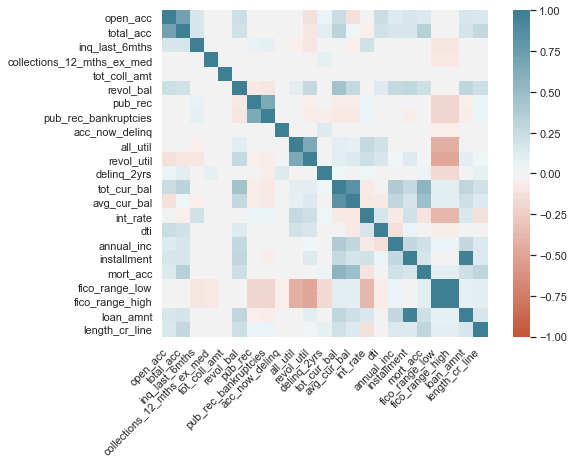

In [55]:
# Heatmap to explore the correlation between numerical features 

numCol = []
for col in X:
  if X[col].dtype == np.float:
    numCol.append(col)
corr = X[numCol].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

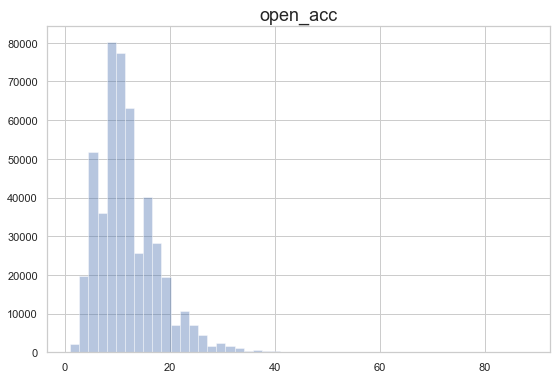

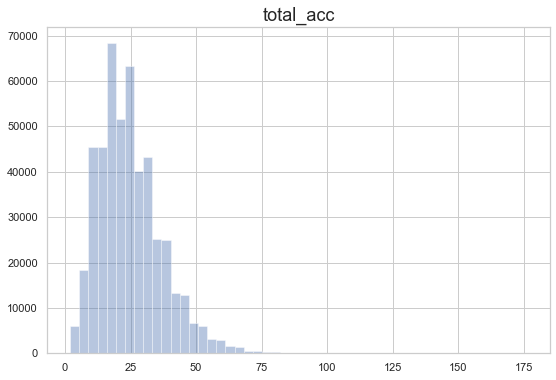

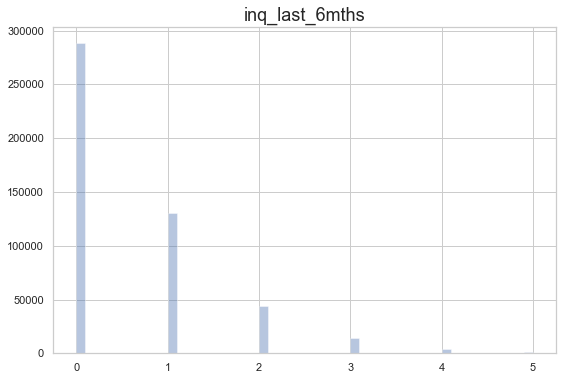

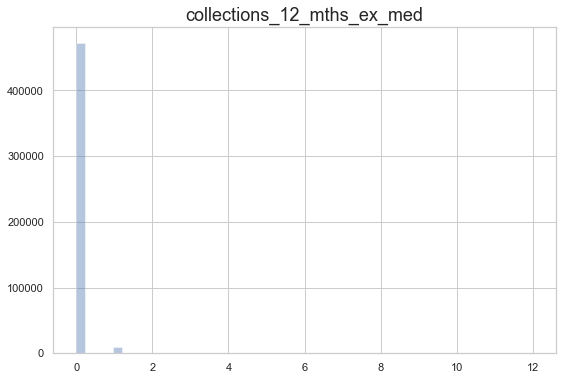

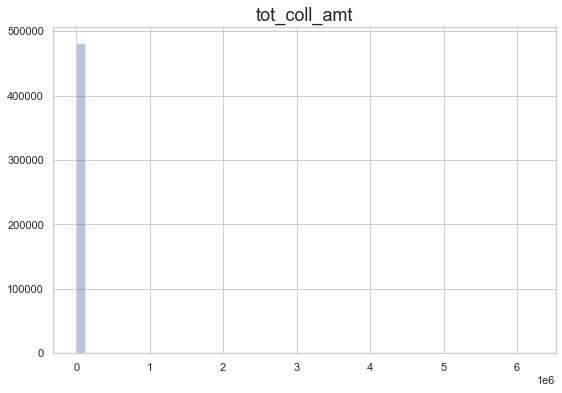

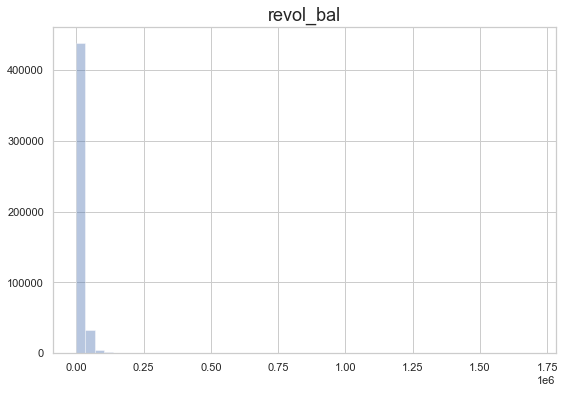

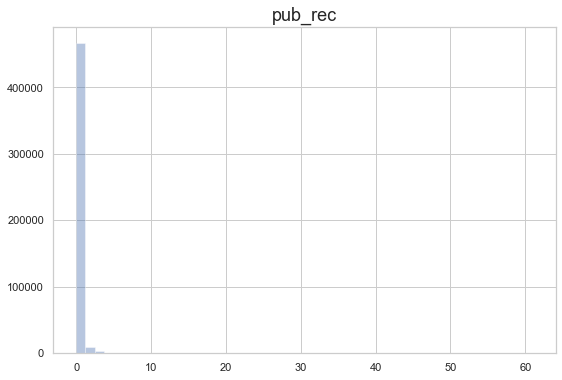

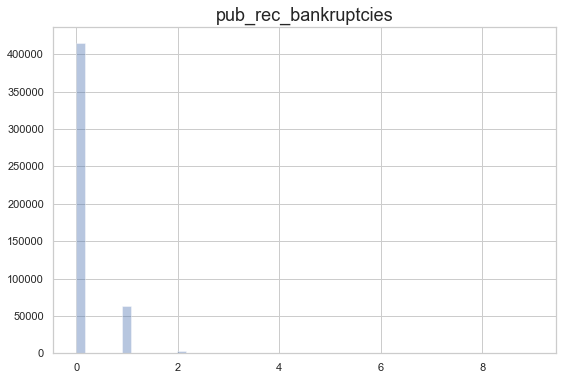

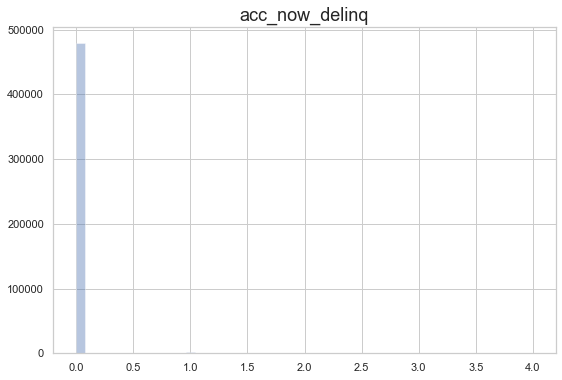

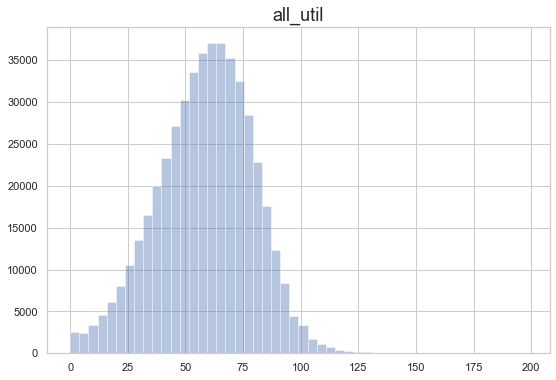

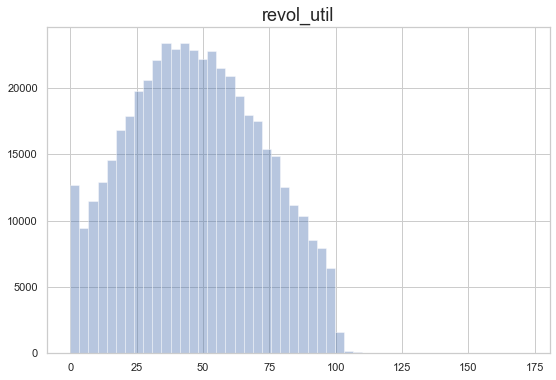

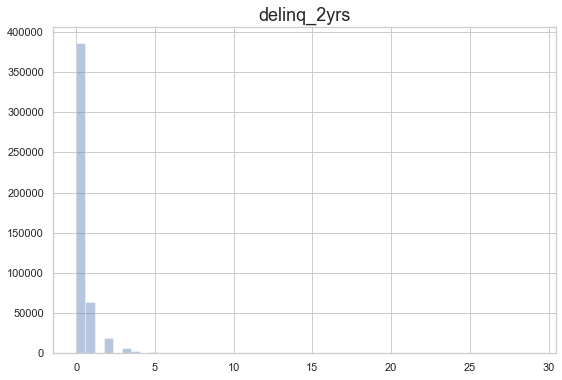

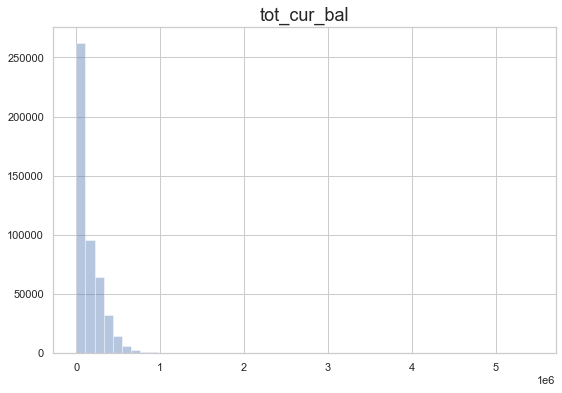

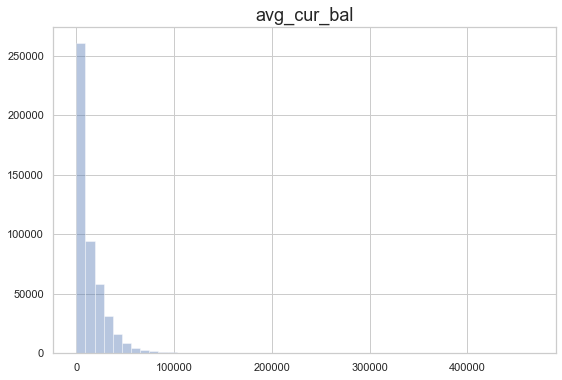

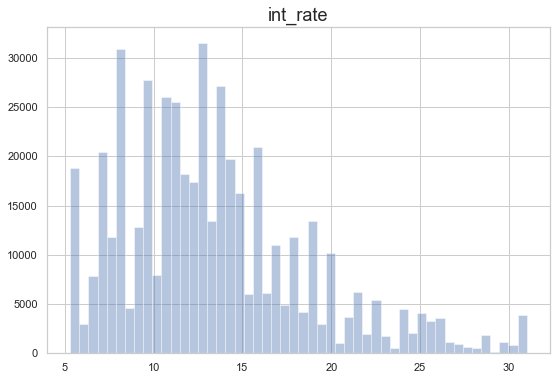

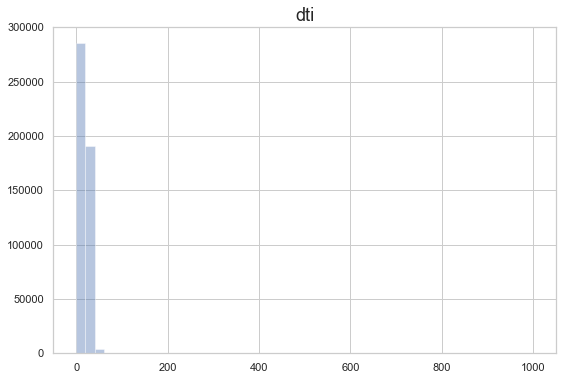

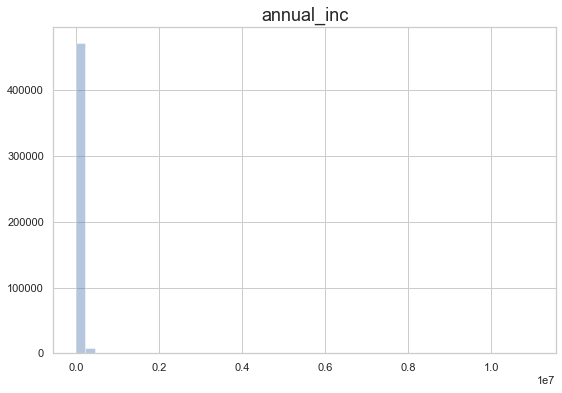

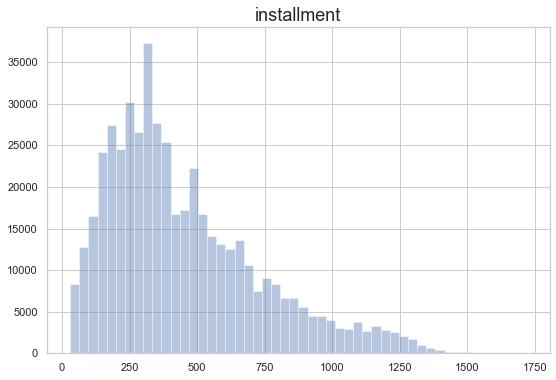

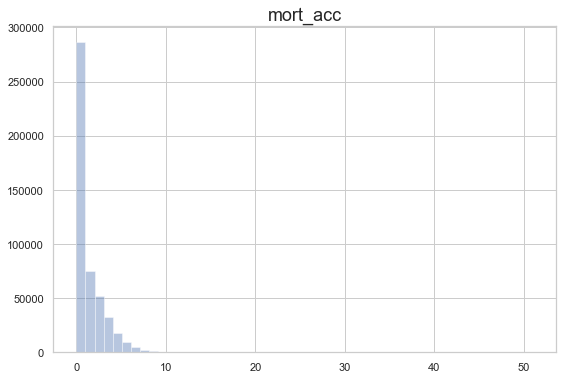

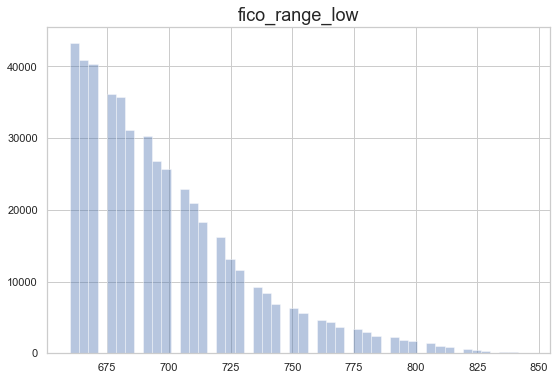

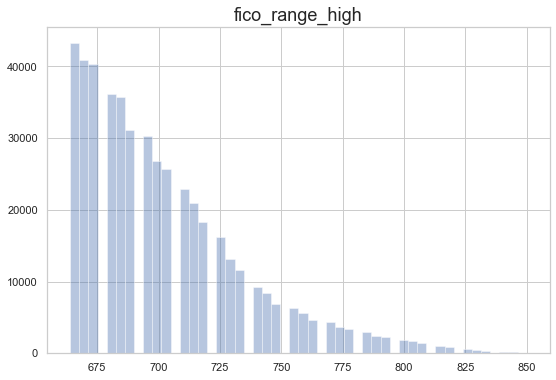

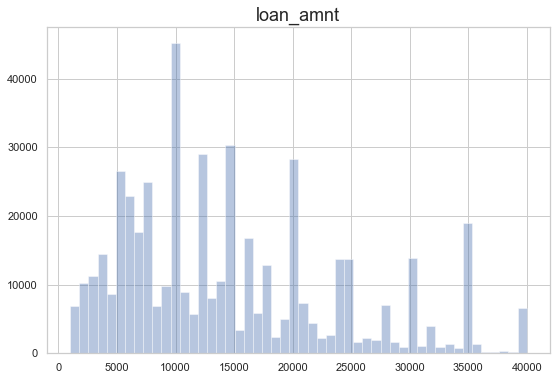

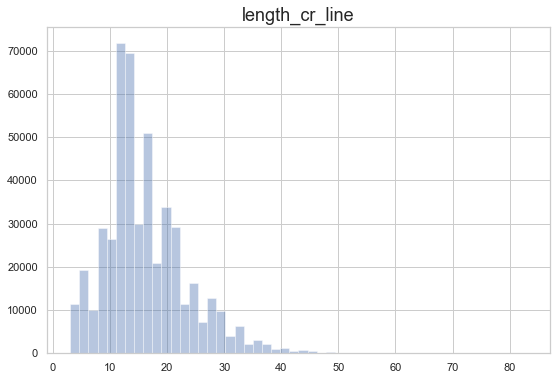

In [56]:
# Numerical 
for col in numCol: 
    plt.figure(col)
    figs_num = sns.distplot(X[col],kde = False)
    figs_num.set(xlabel=None)
    plt.title(f"{col}",fontsize=18)

In [57]:
# Categorical 
categorical_X = ["home_ownership", "purpose", "emp_length", "term", "application_type", "verification_status", "grade"]

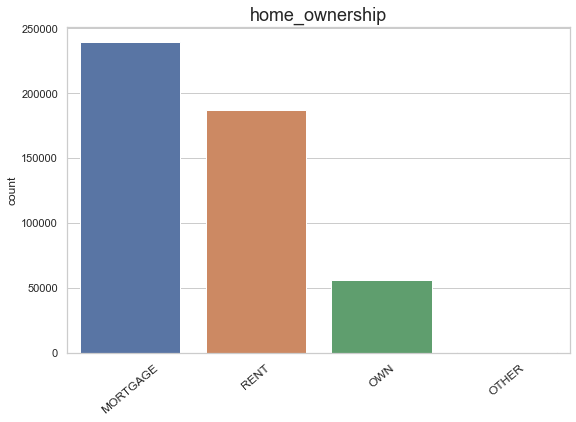

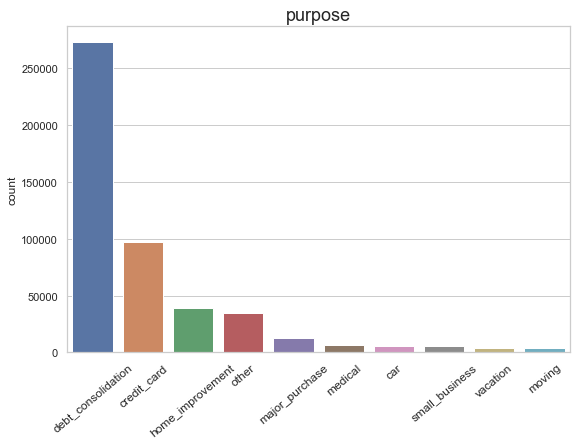

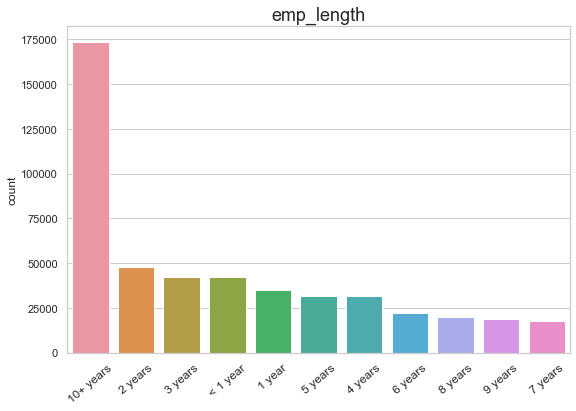

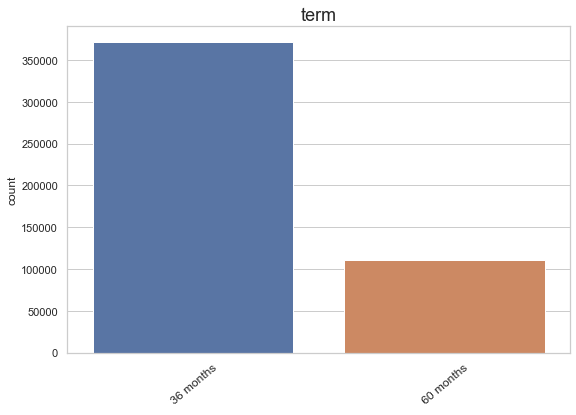

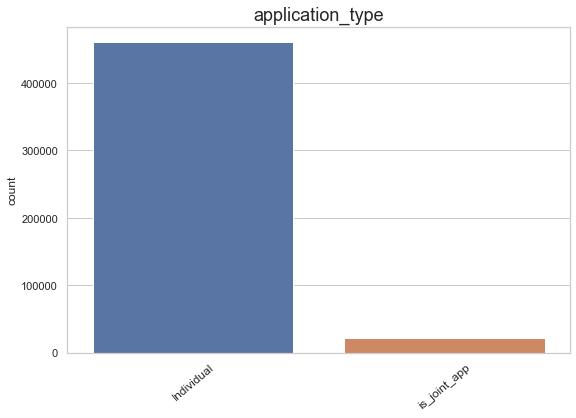

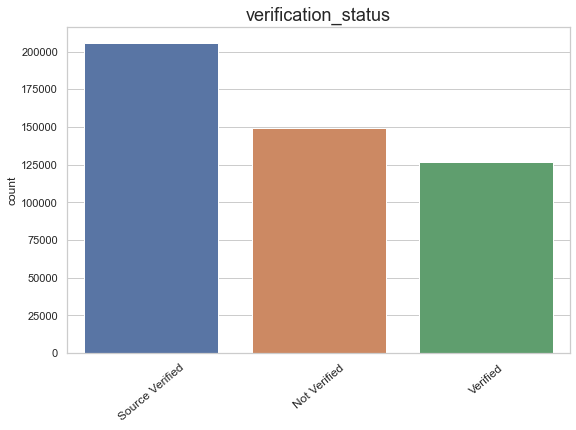

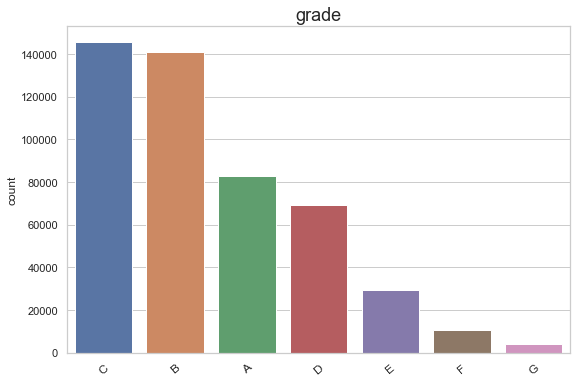

In [58]:
for x in categorical_X:
    plt.figure(x)
    figs = sns.countplot(x=x, data= X, order = X[x].value_counts().index)
    figs.set(xlabel=None)
    figs.set_xticklabels(figs.get_xticklabels(),rotation=40, fontsize = 12)
    plt.title(f"{x}",fontsize=18) 

In [59]:
# Key numerical features grouped by US States

df_location = X.groupby("addr_state",).sum().reset_index()
df_maps =["loan_amnt", "annual_inc", "tot_cur_bal"]
names = {"loan_amnt":"Total Loan Amount", "annual_inc":"Annual Income", "tot_cur_bal":"Total Current Balance"}

import plotly.graph_objects as go

for i in df_maps:
    fig = go.Figure(data=go.Choropleth(
        locations=df_location['addr_state'], 
        z = df_location[i].astype(float), 
        locationmode = 'USA-states',
        colorscale = 'Blues',
        colorbar_title = "Millions USD",
    ))


    fig.update_layout(
        title_text = f'{names[i]} grouped by US States',
        geo_scope='usa',
    )

    fig.show()